<a href="https://colab.research.google.com/github/HaseU-git/GCI_2021/blob/branch/%E7%AC%AC9%E5%9B%9E%E7%9B%AEHands_on%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

コードをターミナル（コマンドプロンプト）上で実行する際に、どの環境で実行しているかはこれを参考にしてください

```
ローカルPC 　　   C:\Users\Owner> or Owner@MacBook-Pro GCI %
EC2　　　　　　　　　　　　　   ubuntu@ip-172-31-7-87:~$
Dockerコンテナ root@43a2429a4b12:/home#
```

## 目次
**<a href='#0'> 0. Introduction</a>** 
><a href='#0-1'> 0.1 なぜGCIでMLOpsを扱うか？</a>
>
><a href='#0-2'> 0.2 なぜMLOpsが注目されているのか？</a>
>
><a href='#0-3'> 0.3 MLOpsとは</a>
>
><a href='#0-4'> 0.4 どこがMLの社会実装の障壁となっているのか？</a>
>
><a href='#0-5'> 0.5 機械学習プロダクトの開発はデータサイエンティストだけの仕事ではない！</a>
>

**<a href='#1'> 1. ハイパーパラメータのチューニング</a>** 
><a href='#1-1'> 1.1 ハイパーパラメータ</a>
>
><a href='#1-2'> 1.2 Optuna</a>
>
><a href='#1-3'> 1.3 RandomForestのハイパーパラメータをOptunaでチューニング</a>
>
><a href='#1-4'> 1.4 多層パーセプトロンのハイパーパラメータをOptunaでチューニング</a>
>

**<a href='#2'> 2. 実験管理</a>** 
><a href='#2-1'> 2.1 実験管理とは</a>
>
><a href='#2-2'> 2.2 実験管理ツールの紹介</a>
>

**<a href='#3'> 3. MLflowを使った実験管理</a>** 
><a href='#3-1'> 2.1 MLflowの使い方</a>
>
><a href='#3-2'> 2.2 MLflowUIの使い方</a>
>

**<a href='#4'> 4. ワークフロー管理</a>** 
><a href='#4-1'> 4.1 ワークフロー管理とは</a>
>
><a href='#4-2'> 4.2 ワークフロー管理ライブラリの紹介</a>
>

**<a href='#5'> 4. Airflowを使ったワークフロー管理</a>** 
><a href='#5-1'> 5.1 Airflowの使い方</a>
>
><a href='#5-2'> 5.2 AirflowUIの使い方</a>
>


<a name='0'></a>
## Introduction

<a name='0-1'></a>
### なぜGCIでMLOpsを扱うか？

GCI受講生には、データサイエンティストやMLエンジニアに興味を持っている方も多くいらっしゃるかと思います。機械学習を社会実装する際には、GCIの講義で学んだ機械学習のコード以外にもインフラ構築や実験管理、ワークフロー管理など様々な技術が活用されます。そして、昨今MLOpsという、機械学習の社会実装に関する様々な障壁を乗り越えるための概念が注目されています。

**GCIでMLOpsを扱う理由は、機械学習の社会実装に、どのような困難が伴うのか、そしてそれを解決するにはどのような手段があるのかを知ることで、機械学習プロダクトの開発に携わる際のTipsを提供することです。**


※MLOpsという分野はまだ未熟でこれが正解というものがない中で、現在わかっている先人たちの知恵をまとめたものになります。各課題にあった最適な方法は個別で考える必要があります。



<a name='0-2'></a>
### なぜMLOpsが注目されているのか？

- PoCで終わってしまう機械学習プロジェクトが多く、社会実装にまで至っていないことがほとんどだから

> PoCとは：PoCとは、Proof of Conceptの略で、日本語では「概念実証」。新たな概念やアイデアの実現可能性を示すために、簡単かつ不完全な実現化（または概要）を行うこと。あるいは原理のデモンストレーションによって、ある概念や理論の実用化が可能であることを示すこと。
https://ja.wikipedia.org/wiki/%E6%A6%82%E5%BF%B5%E5%AE%9F%E8%A8%BC

<img src='https://drive.google.com/uc?export=view&id=1xrL-WopJtCh2Ct5vGpT0PuQ7yXgO6azq' name=機械学習プロジェクトの流れ.png width=100%>

<a name='0-3'></a>
### MLOpsとは

MLOpsはMachine Learning Operationsの略語で開発(dev)と運用(ops)を効率化する概念であるDevOpsとMLの組み合わせだと考えられています。

> DevOpsは、開発と運用を効率的に連携するための概念もしくは文化です。
1. コード ： コードの開発とレビュー、バージョン管理ツール、コードのマージ
2. ビルド ： 継続的インテグレーションのツール、ビルドステータス
3. テスト ： パフォーマンスを決定するためのテストと結果
4. パッケージ ： 案件リポジトリ、アプリの展開前ステージング
5. リリース ： 変更管理、リリース承認、リリース自動化
6. コンフィギュレーション ： インフラストラクチャの設定と管理、インフラストラクチャとしてのコードのツール
7. モニター ： アプリの性能監視、エンドユーザーエクスペリエンス
>
>https://ja.wikipedia.org/wiki/DevOps


DevOpsで考えられていた、開発と運用を効率的に連携する概念や文化を機械学習プロダクトの開発に適応することを目的としたものが、MLOpsです。機械学習プロダクト開発が、DevOpsの枠組みではなく、MLOpsとして考えられている理由は、機械学習開発独自の難しさが存在するからです。

<a name='0-4'></a>
### どこがMLの社会実装の障壁となっているのか？

一度作成した機械学習モデルは時間が経過するにつれて精度が下がってしまいます。これは、学習時のデータと本番環境でのデータの分布に変化が生じることがあるからです。例えば、商品の需要予測をする際も、直近の需要データまでを学習させる必要があるでしょう。なぜなら、学習時のデータと本番環境でのデータの分布が必ずしも同じではないと考えられるからです。

機械学習モデルは、入力の特徴量行列Xと目的変数yとの関係性を記述したものだと考えることができます。機械学習で解く課題は、現実世界の状況に依存しています。そして、現実世界では入力データそのものに変化（データドリフト）が生じたり、入力データと目的変数の関係性に変化（コンセプトドリフト）が生じることがあります。

- データドリフト

    スマートフォンで音声認識をする場合を考えてみましょう。音声認識モデルを作成する際には、学習データが必要なので、既存の音声データセットを購入するなりして用意します。そこで良いモデルが作成できて、スマートフォンで使うとうまくいかないことが起こり得ます。なぜなら、スマートフォンで認識した音声では、ノイズが加わり明瞭さに違いが生じるからです。
    
    このように学習時の入力データと、推論時の入力データの分布の違いによって生じるモデルの性能低下はデータドリフトによるものと分類することができます。

- コンセプトドリフト
    
    アプリの操作ログから、アプリ内での滞在時間を予測をするモデルを考えてみましょう。UIを変更した場合、過去のトラキングデータから、滞在時間を予測するモデルはうまく機能しないことが考えられます。これは、学習時の入力と出力の関係性と推論時の入力と出力の関係性に変化が生じているからです。

    このように、入力データと目的変数の関係性の変化によって生じるモデルの性能低下はコンセプトドリフトによるものと分類することができます。

|  名称  |  定義  | 
| ---- | ---- | 
|  データドリフト  |  入力データに変化  | 
|  コンセプトドリフト  |  入力データと目的変数の関係性に変化  | 

これらを、より詳細に学びたい場合は、<a href='#6'> Appendix</a>にあるCourseraのMLOpsの講義や[こちらの記事](https://towardsdatascience.com/machine-learning-in-production-why-you-should-care-about-data-and-concept-drift-d96d0bc907fb)が詳しいです。

これらの問題に対処する一つの方法として、モデルの継続的な更新を行う基盤が整えることが挙げられます。




<a name='0-5'></a>
### 機械学習プロダクトの開発はデータサイエンティストだけの仕事ではない！

データサイエンティストはモデルを開発し、コードを書いたら仕事が終わりだと考えています。しかし、実際には作成したモデルをデプロイし、精度の検証・モデルの再構築などを行う、継続的な更新が必要です。通常では後者により多くの労力をかける必要があります。

また、ビジネスとして機械学習を活用するためには、いかに機械学習プロダクトをマネジメントするかが重要になります。今回のGCIでは開発・運用に焦点を当てて紹介するためプロジェクトマネジメントについては扱いませんが、ビジネスとして機械学習の活用を考える場合は課題の設定の仕方、KPIの設定、利用可能なデータなどから考える必要があります。



MLOpsとはデータの前処理、モデル開発、デプロイ、運用などを含む機械学習のライフサイクルを管理する技術/知見のことです。

これまでに学んだ機械学習のコードは機械学習プロダクトを開発する中では小さな一要素にしかすぎず、他にも自動化、データ収集、データ検証、特徴量エンジニアリング、テストとデバッグ、リソース管理、モデル評価、プロセス管理とメタデータ管理、インフラ設計、監視などが存在します。

よって、実社会で機械学習プロダクトを開発・運用するには、単に機械学習のコードを書くだけではなく、様々な技術を駆使する必要があります。

<img src='https://drive.google.com/uc?export=view&id=1vmiWmdXltlyv3Fm7wqwpgjcGTMdhWndh' name=MLシステムの要素.png width=100%>

**[Hidden Technical Debt in Machine Learning Systems](https://papers.nips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf)からの抜粋**


<br>




機械学習プロダクトのデータの収集からモデルのデプロイまでを手動で行う一連の流れは、一般的にこのように構成されます。


<img src='https://drive.google.com/uc?export=view&id=1YPC4EwDTet69eE7QASwlwVSjMLeedjD9' name=MLOps手動プロセス.png width=100%>


ここでは、これまでのコンペティションで行ったのと同じように、データの前処理→モデルの学習→評価までの流れは、ノートブックのようなインタラクティブな環境で行われます。

この手動プロセスは本番環境には、pickleファイルのようなモデルのアーキテクチャをデプロイし、継続的なモデルの更新やリアルタイムのパフォーマンスの監視は想定していません。

<br>
<br>

より自動化された機械学習プロダクトの一連の流れは、このように構成されています。
<img src='https://drive.google.com/uc?export=view&id=1nH89B0oUmI9rmiRYr8OVmut47joFTdUO' name=MLOps半自動プロセス.png width=100%>

画像引用：[MLOps: 機械学習における継続的デリバリーと自動化のパイプライン図２、図３より引用](https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning)


ここでは、背景が青色の部分は自動化されており、開発環境での機械学習パイプラインのソースコードを本番環境にデプロイします。

パイプラインのコードを本番環境にデプロイすることで、モデルの継続的なトレーニングを実行することができるようになり、新しいデータへの適合や再トレーニングするプロセスを自動化することが可能になります。

機械学習のビジネス適用が進む中で、モデルを継続的に管理、運用するという新たなチャレンジがでてきており、このテーマでの議論もよく聞かれるようになってきました。
近年では、MLOps勉強会や専門のカンファレンスも開催され、熱気にあふれています。

この章ではMLOpsの構成要素である**実験管理**と**ワークフロー管理**の基礎を簡単な実装とともに紹介していきます。

<a name='1'></a>
## 1. ハイパーパラメータのチューニング

ここでは、実験管理で活用するハイパーパラメータの自動チューニングについて紹介します。

<a name='1-1'></a>
### 1.1 ハイパーパラメータ

#### パラメータとは


機械学習を行う上でのパラメータとは、モデルの学習や与えられたデータから得られるものです。そのため、モデルに内在する設定変数であり、その値はデータから推定することができます。

- モデルで予測を行う際に必要になるもの
- これらの値は問題に対するモデルのスキルを定義する
- データから推定や学習される
- 多くの場合、手動で設定されない
- 多くの場合、学習したモデルの一部として保存される

パラメータは機械学習アルゴリズムの鍵であり、過去の学習データから学習されたモデルの一部です。モデルを仮説としてパラメータを特定のデータに合わせて仮説を調整するものと考えることができます。多くの場合、パラメータは最適化アルゴリズムを使い推定されます。

例) ガウス分布などの変数の分布における平均や標準偏差、ニューラルネットワークの重みやロジスティック回帰の係数


#### ハイパーパラメータとは

機械学習を行う上でのハイパーパラメータとは、モデル作成の設計図のようなもので、あらかじめ決めておくものです。そのため、モデル外部の設定でありデータから値を推定しないことが基本です。

- 多くの場合、モデルのパラメータを推定するプロセスで使用される
- 多くの場合、手動で値を決める
- 多くの場合、ヒューリスティックに設定できる
- 特定の予測モデリング問題のためにチューニングを行うことが多い

特定の問題に対するモデルのハイパーパラメータのベストな値を知ることはできません。経験則を使用したり、他の問題に対して使った値を流用したりや試行錯誤しながら、ベストな値の探索を行います。

例)ニューラルネットワークを学習させるための学習率、層の数、K近傍法におけるK

参考) ランダムフォレスト(RandomForestClassifier)のハイパーパラメータ
[ランダムフォレストの公式ドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


|  パラメータ  |  型  |  デフォルトの値  | 
| ---- | ---- | ---- | 
|  n_estimator  |  int  |  100  | 
|  criterion  |  {“gini”, “entropy”}  |  ”gini”  | 
|  max_depth  |  int  |  None  |  
|  min_samples_split  |  int or float  |  2  |  
|  min_samples_leaf  |  int or float  |  1  |  
|  min_weight_fraction_leaf  |  float  |  0.0  |  
|  max_features  |  {“auto”, “sqrt”, “log2”}, <br> int or float  |  ”auto”  |  
|  max_leaf_nodes  |  int  |  None  |  
|  min_impurity_decrease  |  float  |  0.0  |  
|  min_impurity_split  |  float  |  None  | 
|  bootstrap  |  bool  |  True  |  
|  oob_score  |  bool  |  False  |  
|  n_jobs  |  int  |  None  |  
|  random_state  |  int  |  None  |  
|  verbose  |  int  |  0  |  
|  warm_start  |  bool  |  False  |  
|  class_weight  |  {“balanced”, “balanced_subsample”}, <br> dict or list of dicts  |  None  |  
|  ccp_alpha  |  non-negative float  |  0.0  | 
|  max_samples  |  int or float  |  None  |  



ハイパーパラメータは学習器によっても異なり、数も少なくないため、ハイパーパラメータを手動で調整するのは難しいといえます。

そこで、ハイパーパラメータの自動チューニングが用いられます。

#### ハイパーパラメータのチューニング方法

- グリッドサーチ
  
    指定した探索空間を格子状に区切り、格子点上の値の全組み合わせから適切なハイパーパラメータを探索する手法。

    例)パラメータX(1, 3, 5)とパラメータY(0, 1)の二つのパラメータのチューニングを行う場合は、3*2 = 6通りの探索を行います。

- ランダムサーチ

    指定した探索空間からあらかじめ決めた回数パラメータを無作為に抽出して適切なハイパーパラメータを探索する手法。
    
    グリッドサーチの格子上から回数制限を設けて無作為に抽出を行うため探索空間が大きくても対応できます。

- ベイズ最適化

    一つ前の探索結果を基に次に探索する場所を決めていくことでヒューリスティックに適切なハイパーパラメータを探索する手法。


そのなかでも今回はOptunaを使ったベイズ最適化によるハイパーパラメータチューニングを紹介します。


<a name='1-2'></a>
### 1.2 Optuna



OptunaはPreferred Networks(PFN)の提供するハイパーパラメータ自動最適化フレームワークです。

Optunaは次の試行で試すべきハイパーパラメータの値を決めるために、完了している試行の履歴を用いています。そこまでで完了している試行の履歴に基づき、有望そうな領域を推定し、その領域の値を実際に試すということを繰り返します。そして、新たに得られた結果に基づき、更に有望そうな領域を推定します。具体的には、Tree-structured Parzen Estimator というベイズ最適化アルゴリズムの一種を用いています。

【PFNのOptuna紹介ページ】https://www.preferred.jp/ja/projects/optuna/

【公式ページ】https://optuna.org/

【開発者ブログ】https://tech.preferred.jp/ja/blog/optuna-release/

【チュートリアル】https://optuna.readthedocs.io/en/stable/tutorial/index.html

【GitHub】https://github.com/optuna/optuna



[主な機能](https://optuna.readthedocs.io/en/stable/)

- [軽量で汎用性が高く、プラットフォームに依存せず使用できる](https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/001_first.html)

    OptunaはPythonで記述されており、依存関係はほとんどないのでPythonが使えればすぐに使える。

- [Pythonらしいコードで探索空間の定義が行える](https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/002_configurations.html)

    Optunaでは条件分岐やループなど、Pythonでおなじみの構文を使って検索空間を定義できます。

- [効率的な最適化アルゴリズム](https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html)

    ハイパーパラメータのサンプリングや、不必要なトライアルの効率的な刈り込みなどを行うため無駄の少ないハイパーパラメータ探索が行える。

- [簡単に並列化を行える](https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/004_distributed.html)

    コードをほとんど変更することなく、数十人から数百人の規模の研究を行うことができます。Kubernetesでも使うことができる。

- [すばやく可視化できる](https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html)

    様々なプロッティング機能により、最適化の履歴を確認できるので、最適化の結果を視覚的に分析することができる。


<a name='1-3'></a>
### 1.3 RandomForestのハイパーパラメータをOptunaでチューニング


Optunaを使ってRandomForestの3つのハイパーパラメータ(max_depth、min_samples_leaf、max_features)を実際にチューニングを行いその効果を確認しましょう。

In [ ]:
# optunaのインストール
!pip install optuna

     |████████████████████████████████| 307kB 4.3MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 174kB 31.6MB/s 
     |████████████████████████████████| 112kB 30.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 143kB 27.0MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=379edf688b8a86e5c253f3f2697dadce56c0539eb9594d4bc6081a0b30d41aac
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


まず、Scikit-Learnで準備されている乳がんのデータを使い、ランダムフォレストを使い悪性(malignant)と良性(benign)を0/1で二値分類を行ってみましょう。



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 乳がんデータの準備
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = cancer.target

# 学習データと検証データに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# データ数と欠損値の確認
print(f'X_train: {X_train.shape}')
print(f'y_train: {len(y_train)}')
print(f'欠損値: {X_train.isnull().sum().sum()+np.isnan(y_train).sum()}\n')
print(f'X_test: {X_test.shape}')
print(f'y_test: {len(y_test)}')
print(f'欠損値: {X_test.isnull().sum().sum()+np.isnan(y_test).sum()}')

X_train: (426, 30)
y_train: 426
欠損値: 0

X_test: (143, 30)
y_test: 143
欠損値: 0


In [ ]:
# ランダムに1行取得して列と値の確認
X_test.sample(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
158,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.01963,0.159,0.05907,0.1822,0.7285,1.171,13.25,0.005528,0.009789,0.008342,0.006273,0.01465,0.00253,13.14,18.41,84.08,532.8,0.1275,0.1232,0.08636,0.07025,0.2514,0.07898


In [ ]:
print(f'目的変数の種類: {np.unique(y_train)}')

目的変数の種類: [0 1]


ハイパーパラメータをデフォルトの値のまま変えずにランダムフォレストに学習させ予測を行ってみます。

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
print('ランダムフォレスト(チューニングなし)')
print(f'学習データに対する正答率: {accuracy_score(y_train, base_model.predict(X_train))}')
print(f'検証データに対する正答率: {accuracy_score(y_test, base_model.predict(X_test))}')

ランダムフォレスト(チューニングなし)
学習データに対する正答率: 1.0
検証データに対する正答率: 0.965034965034965


ここからは、Optunaを使ってランダムフォレストのハイパーパラメータの探索を行っていきます。

Optunaでは、目的関数を設定することで指定したハイパーパラメータを任意の範囲で探索することができます。

以下のコードのようにOptunaでは、以下の関数を定義して目的関数を設定できます。

今回は、分類の評価指標を正答率(accuracy)として、それを最大化するように作成しています。

In [ ]:
import optuna

def objective(trial):

    param_grid_rfc = {
        # max_depthを[2, 16]から探索
        "max_depth": trial.suggest_int("max_depth", 2, 16),
        # min_samples_leafを[2, 4]から探索
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 4),
        # max_featuresを[2, 30(特徴量の最大数)]から探索
        'max_features': trial.suggest_int("max_features", 2, X_test.shape[1]),
        "random_state": 42
    }

    model = RandomForestClassifier(**param_grid_rfc)
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

# directionで目的変数の最大化を指定しています
# samplerでOptunaの乱数を固定しています
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
# n_trialsで探索を行う回数を指定しています
study.optimize(objective, n_trials=20)
print(f'探索したパラメータ: {study.best_params}')
# print(f': {study.best_value}')
rfc_best_param_v1 = study.best_params

[I 2021-06-15 08:51:44,520] A new study created in memory with name: no-name-46480a53-3951-4547-baa7-61eecf72f5c2
[I 2021-06-15 08:51:44,886] Trial 0 finished with value: 0.965034965034965 and parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 23}. Best is trial 0 with value: 0.965034965034965.
[I 2021-06-15 08:51:45,097] Trial 1 finished with value: 0.965034965034965 and parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 6}. Best is trial 0 with value: 0.965034965034965.
[I 2021-06-15 08:51:45,351] Trial 2 finished with value: 0.965034965034965 and parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'max_features': 19}. Best is trial 0 with value: 0.965034965034965.
[I 2021-06-15 08:51:45,804] Trial 3 finished with value: 0.958041958041958 and parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 30}. Best is trial 0 with value: 0.965034965034965.
[I 2021-06-15 08:51:46,020] Trial 4 finished with value: 0.965034965034965 and parameters

探索したパラメータ: {'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 7}


In [ ]:
from optuna.visualization import plot_optimization_history
# 最適化の様子の視覚化
plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_contour
# ハイパーパラメータ間の関係の視覚化
# 追加
plot_contour(study)

In [ ]:
from optuna.visualization import plot_param_importances
# ハイパーパラメータの重要度の視覚化
plot_param_importances(study)

In [ ]:
tuning_model_v1 = RandomForestClassifier(random_state=42, **rfc_best_param_v1)
tuning_model_v1.fit(X_train, y_train)
print('ランダムフォレスト(正答率に対してチューニング)')
print(f'学習データに対する正答率: {accuracy_score(y_train, tuning_model_v1.predict(X_train))}')
print(f'検証データに対する正答率: {accuracy_score(y_test, tuning_model_v1.predict(X_test))}')

ランダムフォレスト(正答率に対してチューニング)
学習データに対する正答率: 0.9882629107981221
検証データに対する正答率: 0.972027972027972


次は、目的関数の中でStratifiedKFoldを使いハイパーパラメータ探索を行ってみましょう。

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate


def objective(trial):
    param_grid_rfc = {
        "max_depth": trial.suggest_int("max_depth", 5, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        'min_samples_split': trial.suggest_int("min_samples_split", 7, 15),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        'max_features': trial.suggest_int("max_features", 3, X_test.shape[1]),
        "random_state": 42
    }

    model = RandomForestClassifier(**param_grid_rfc)

    score_funcs = [
                    'accuracy',
                    ]
   
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(model, X=X_train, y=y_train, cv=kf, scoring=score_funcs)

    return scores['test_accuracy'].mean()

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=20)
print(study.best_params)
print(study.best_value)
rfc_best_param_v2 = study.best_params

[I 2021-06-15 08:54:13,948] A new study created in memory with name: no-name-6619a075-3b8c-4041-9d57-1f7c0aadb76a
[I 2021-06-15 08:54:14,890] Trial 0 finished with value: 0.9460465116279071 and parameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 13, 'criterion': 'gini', 'max_features': 7}. Best is trial 0 with value: 0.9460465116279071.
[I 2021-06-15 08:54:16,544] Trial 1 finished with value: 0.948372093023256 and parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 12, 'criterion': 'gini', 'max_features': 30}. Best is trial 1 with value: 0.948372093023256.
[I 2021-06-15 08:54:18,299] Trial 2 finished with value: 0.9577564979480165 and parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 17}. Best is trial 2 with value: 0.9577564979480165.
[I 2021-06-15 08:54:19,776] Trial 3 finished with value: 0.9530506155950753 and parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 25}
0.9648153214774282


In [ ]:
# plot_optimization_history(study)

In [ ]:
tuning_model_v2 = RandomForestClassifier(random_state=42, **rfc_best_param_v2)
tuning_model_v2.fit(X_train, y_train)
print('ランダムフォレスト(5 foldを行い正答率の平均に対してチューニング)')
print(f'学習データに対する正答率: {tuning_model_v2.score(X_train, y_train)}')
print(f'検証データに対する正答率: {tuning_model_v2.score(X_test, y_test)}')

ランダムフォレスト(5 foldを行い正答率の平均に対してチューニング)
学習データに対する正答率: 0.9929577464788732
検証データに対する正答率: 0.972027972027972


In [ ]:
print('ランダムフォレスト(チューニングなし)')
print(f'検証データに対する正答率: {accuracy_score(y_test, base_model.predict(X_test))}')

# print('ランダムフォレスト(正答率に対してチューニング)')
print('ランダムフォレスト(チューニングあり)')
print(f'検証データに対する正答率: {accuracy_score(y_test, tuning_model_v1.predict(X_test))}')

print('ランダムフォレスト(5回foldを行い正答率の平均に対してチューニング)')
print(f'検証データに対する正答率: {tuning_model_v2.score(X_test, y_test)}')

ランダムフォレスト(チューニングなし)
検証データに対する正答率: 0.965034965034965
ランダムフォレスト(チューニングあり)
検証データに対する正答率: 0.972027972027972
ランダムフォレスト(5回foldを行い正答率の平均に対してチューニング)
検証データに対する正答率: 0.972027972027972


機械学習を行う上で目的とする検証データの精度向上が確認できます。

今回紹介した使い方以外にもfold毎にパラメータチューニングを行い予測を行う方法などもあり、optunaは目的に応じて様々なチューニングが行えます。

<a name='1-4'></a>
### 1.4 多層パーセプトロンのハイパーパラメータをOptunaでチューニング

Optunaを使いRandomForestをチューニングしましたが、Optunaはscikit-learnの他にも様々なフレームワークで使用することができます。

[フレームワークの例](https://optuna.org/#code_examples)

* PyTorch

* Chainer

* TensorFlow

* Keras

* MXNet

* Scikit-Learn

* XGBoost

* LightGBM



【興味がある方向け】

ここではPyTorchとOptunaを使い画像分類のハイパーパラメーターの探索を行ってみましょう。

画像は、[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)を使用します。


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw




Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw




Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw




Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning:

The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)



Done!
ラベル:3


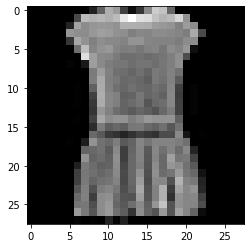

In [ ]:
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets
from torchvision import transforms
import optuna
from optuna.trial import TrialState
import matplotlib.pyplot as plt
%matplotlib inline

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCHSIZE = 128
CLASSES = 10
DIR = os.getcwd()
EPOCHS = 10
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 30
N_VALID_EXAMPLES = BATCHSIZE * 10
import matplotlib.pyplot as plt
%matplotlib inline

train_set = datasets.FashionMNIST(DIR, train=True, download=True, transform=transforms.ToTensor())
valid_set = datasets.FashionMNIST(DIR, train=False, transform=transforms.ToTensor())

# どんなデータが入ってるか確認をしてみます。
print(f'ラベル:{train_set[3][1]}')
plt.imshow(train_set[3][0].reshape(28, 28), cmap='gray')

In [ ]:
def define_model(trial):
    n_layers = 1
    layers = []

    in_features = 28 * 28
    for i in range(n_layers):
        out_features = 128
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, CLASSES))
    layers.append(nn.LogSoftmax(dim=1))

    return nn.Sequential(*layers)


def get_mnist():
    
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(DIR, train=True, download=True, transform=transforms.ToTensor()),
        batch_size=BATCHSIZE,
        shuffle=True,
    )
    valid_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(DIR, train=False, transform=transforms.ToTensor()),
        batch_size=BATCHSIZE,
        shuffle=True,
    )

    return train_loader, valid_loader


def objective(trial):

    model = define_model(trial).to(DEVICE)

    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    train_loader, valid_loader = get_mnist()

    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)

                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(valid_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize",sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective, n_trials=30, timeout=600)

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-05-31 10:48:01,393] A new study created in memory with name: no-name-76e0a9f2-7f64-4c50-8c35-8a24e8cc21f2
[I 2021-05-31 10:48:06,014] Trial 0 finished with value: 0.6734375 and parameters: {'dropout_l0': 0.3123620356542087, 'optimizer': 'Adam', 'lr': 4.207988669606632e-05}. Best is trial 0 with value: 0.6734375.
[I 2021-05-31 10:48:10,255] Trial 1 finished with value: 0.80234375 and parameters: {'dropout_l0': 0.24679835610086082, 'optimizer': 'RMSprop', 'lr': 0.006796578090758156}. Best is trial 1 with value: 0.80234375.
[I 2021-05-31 10:48:14,566] Trial 2 finished with value: 0.64765625 and parameters: {'dropout_l0': 0.20617534828874073, 'optimizer': 'Adam', 'lr': 5.3370327626039544e-05}. Best is trial 1 with value: 0.80234375.
[I 2021-05-31 10:48:18,741] Trial 3 finished with value: 0.7578125 and parameters: {'dropout_l0': 0.2550213529560302, 'optimizer': 'RMSprop', 'lr': 0.0001461896279370495}. Best is trial 1 with value: 0.80234375.
[I 2021-05-31 10:48:22,839] Trial 4 finis

Study statistics: 
  Number of finished trials:  30
  Number of pruned trials:  19
  Number of complete trials:  11
Best trial:
  Value:  0.81796875
  Params: 
    dropout_l0: 0.49087538832936756
    optimizer: RMSprop
    lr: 0.002463768595899745


In [ ]:
from optuna.visualization import plot_optimization_history
# 最適化の様子の視覚化
plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_contour
# ハイパーパラメータ間の関係の視覚化
plot_contour(study)

In [ ]:
from optuna.visualization import plot_param_importances
# パラメータの重要度の視覚化
plot_param_importances(study)

---

<a name='2'></a>
## 2. 実験管理

<a name='2-1'></a>
### 2.1 実験管理とは

機械学習モデルの作成には、さまざまな試行錯誤が必要です。一般に多くの実験が行われ、それぞれのモデルの性能を評価しながらモデルの構築を進めていきます。 


<img src='https://drive.google.com/uc?export=view&id=1jKB3wAAUS-Lk1YSCxhfk4x61yuwo2CTe' name=MLflowの4つの要素.png width=100%>

実験を後から振り返った時、どんな実験であったのかを記録していないと、同じ実験を繰り返さなければならなくなったり、どんなモデルが良かったのかがわからなくなってしまいます。こうした機械学習モデルの開発プロセスに関する問題の解消に、実験管理の活用が期待されます。


機械学習モデルの開発において記録しておきたいものは主に以下の情報です。
- コードバージョン
- データバージョン
- ハイパーパラメータ
- メトリクス
- 環境
 
<br>

しかし、これらの管理を効率的に行うことは以下の理由から困難だと言えます。

- 実験の記録を取るのは難しい

    ファイルやJupyterNotebookで作業している場合、特定の結果を得るためにどのデータ、コード、パラメータが使われたかをどのように記録すべきか

- コードを再現するのは難しい

    コードのバージョンやパラメータを綿密に追跡したとしても、同じ結果を再び得るためには、環境全体（例えば、ライブラリの依存関係）を把握する必要があります。これは、別のデータサイエンティストに自分のコードを使ってもらいたい場合や、同じコードを別のプラットフォーム（例えばクラウド）で大規模に実行したい場合には、特に困難です。

- モデルをパッケージ化してデプロイする標準的な方法がない

    各データサイエンスチームは、使用するMLライブラリごとに独自のアプローチをとっており、モデルとそれを生成したコードやパラメータとの間のリンクが失われがちです。

- モデル（そのバージョンやステージの遷移）を管理するセントラルストアがない

    データサイエンスチームは多くのモデルを作成します。モデルのライフサイクルを共同で管理する中心的な場所がないため、データサイエンスチームは、開発からステージング、そして最終的にはアーカイブや本番まで、それぞれのバージョン、アノテーション、履歴など、モデルの状態をどのように管理するかという課題に直面しています。


<a name='2-2'></a>
### 2.2 実験管理ツールの紹介

|  ツール名  |  開発元  |  特徴  | 
| ---- | ---- | ---- | 
|  MLflow | Databricks |  機械学習ライフサイクル全体の管理を支援するオープンソースプラットフォーム　[GitHub](https://github.com/mlflow/mlflow/)  | 
|  Neptune | Neptune |  軽量の実験管理及びコラボレーションツール　[公式サイト](https://neptune.ai/blog/best-tools-to-manage-machine-learning-projects)  | 
|  Comet | Comet | 　実験とモデルを追跡、比較、説明、最適化するためのメタ機械学習プラットフォーム　[公式サイト](https://www.comet.ml/site/)  | 


---

<a name='3'></a>
## 3. MLflowを使った実験管理

MLflow 公式ドキュメント：https://mlflow.org/docs/latest/index.html

> MLflowは、あらゆる機械学習ライブラリと連携し、実装コードの多くのことを慣習的に決定し、既存のコードベースに統合するために必要な変更を最小限に抑えるように設計されています。同時にMLflowは、そのフォーマットで書かれたどんなコードベースでも、複数のデータサイエンティストが再現性を持って再利用できるようにすることを目指しています。

MLflowは、実験、再現性、デプロイメント、セントラルモデルレジストリなど、MLライフサイクルを管理するためのオープンソースのプラットフォームです。MLflowは現在、4つのコンポーネントを提供しています。

<img src='https://drive.google.com/uc?export=view&id=19WuhM_bdkgzmO-DXxrHQjhTRmWN8QvWx' name=MLflowの4つの要素.png width=100%>


- MLflow Trackingとは、環境、コード、データ、精度、ハイパーパラメータなどを管理しておくものです。ML Trackingを使うことで、実験管理の煩わしさが軽減される可能性があります。

- MLflow Projectsとは、機械学習を実行する環境をどこでも再現できるようにパッケージ化するものです。具体的にはcondaの設定ファイルなどが記述してあります。

- MLflow Modelsとは、学習済みモデルやパイプラインのデプロイを簡単にするものです。MLflow Modelsにより、システムへの組み込みが容易になる可能性があります。

- Model Registryとは機械学習モデル等を保存しておくためのレジストリです。バージョン管理やタグ付けなども行うことが可能です。








今回は、コードやデータ、実験結果の管理をすることができるMLflow Trackingについて扱います。

<a name='3-1'></a>
### 3.1 MLflowの使い方

機械学習でよく用いられるIrisデータセットで、LightGBMのハイパーパラメータをOptunaで最適化した際の実験管理の仕方を例として紹介します。

MLflowでハイパーパラメータと評価指標のトラッキングをするためには、以下のように指定します。
```python
mlflow.log_params(trial.params)
mlflow.log_metrics({"log_loss": loss})
```

また、MLflowには、mlflow.lightgbm.autologモジュールが用意されており、LightGBMを使用した場合、以下の情報の自動トラッキングを有効にすることができます。
- lightgbm.trainで指定されたパラメーター
- 各イテレーションでのメトリクス（valid_setsが指定されている場合）
- 最良のイテレーションにおけるメトリクス（early_stopping_roundsが指定されている場合）
- 特徴の重要度（"split "と "gain "の両方）のJSONファイルとプロット

mlflow.lightgbm.autologモジュールの詳細は[こちらのドキュメント](https://www.mlflow.org/docs/latest/python_api/mlflow.lightgbm.html)を参照してください。


**ここから、AWSのEC2インスタンスに入り作業を行います**

前回と同様に、pemファイルがあるところまで移動しssh接続します（lsでpemファイルがあるか確認）
```shell
ssh -i <key-pair-name>.pem ubuntu@<my-instance-public-dns-name>
#ubuntu@ip- :~$となったらログイン成功
```

前回作成した、docker imageが存在するか確認しましょう
```shell
docker images
```

mlops_envとubuntuのdocker imageが確認できたら以下のコマンドで、docker runを実行します
```
docker run -it -v /home/ubuntu/MLOps_tutorial:/home --rm --name mlops -p 8080:8080 -p 5000:5000 mlops_env /bin/bash
```
dockerのコンテナ内に入れたことを確認しましょう

のちにターミナルをもう一つ使うので、あらかじめ準備をしておきます

> Macの方は⌘+Tでターミナルをもう一つ起動できます
>
> Windowsの方は一つ目立ち上げた時と同じ方法で起動できます

pemファイルがあるところまで移動しssh接続します（lsでpemファイルがあるか確認）
```shell
ssh -i <key-pair-name>.pem ubuntu@<my-instance-public-dns-name>
```

先ほどdocker runで立ち上げたコンテナの中に入り操作をするためにdocker execコマンドを実行します
```shell
docker exec -it mlops /bin/bash
```
こちらでもdockerのコンテナ内に入れたことを確認しましょう

#### MLflowで学習を記録する

**初めに立ち上げたターミナルに戻り**、root@43a2429a4b12:/home/Day2_mlflow/に移動しましょう

```
cd /home/Day2_mlflow/
```


```
python3 train.py
```
を実行すると、Optunaによるハイパーパラメータの探索が始まり、MLflowがそれを記録します。

##### 実装コードの例

今回使用するコード全体はこのようになっています。

データセットはIrisデータセットを使用し、lightgbmで学習を実行します。

```python
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import lightgbm as lgb
import optuna
import mlflow
import mlflow.lightgbm


def objective(trial):
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_set = lgb.Dataset(X_train, label=y_train)
    test_set = lgb.Dataset(X_test, label=y_test)

    param = dict(objective="multiclass", metric="multi_logloss", num_class=3,
                 lambda_l1=trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
                 lambda_l2=trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
                 num_leaves=trial.suggest_int("num_leaves", 2, 256),
                 feature_fraction=trial.suggest_uniform("feature_fraction", 0.4, 1.0),
                 bagging_fraction=trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
                 bagging_freq=trial.suggest_int("bagging_freq", 1, 7),
                 min_child_samples=trial.suggest_int("min_child_samples", 5, 100), seed=42)

    gbm = lgb.train(param, train_set, valid_sets=test_set)
    y_proba = gbm.predict(X_test)
    y_pred = np.argmax(y_proba, axis=1)
    loss = log_loss(y_test, y_proba)

    return loss


def main():
    # enable auto logging
    print("#" * 20)
    mlflow.lightgbm.autolog()

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


if __name__ == "__main__":
    main()

```

#### MLflowUI, AirflowUIへアクセスするための準備

自分のブラウザ上からEC2上にアクセスするため、EC2上でインバウンドルールの追加を行います。

>インバウンドルールでは、未設定の場合は全ての通信を遮断し、許可した通信のみを通過させます。



EC2 -> インスタンス -> {作ったインスタンス概要}へ移動

セキュリティタブへ移動 -> セキュリティグループをクリック -> 下記のようにインバウンドルールを編集




<img src='https://drive.google.com/uc?export=view&id=1aLyktJBXxqfaYRN01eMvzNnBUSOOimid' name=インバウンドルールの追加.png width=80%>


※ソースで「任意の場所」を選択すると、インスタンスのIPアドレスを知る人なら、誰もが[http://<EC2のパブリック IPv4 アドレス>:5000](#)等にアクセスできるようになります。

<a name='3-2'></a>
### 3.2 MLflowUIの使い方

MLflowの強みは、リッチなUIがすでに用意されていることです。先程実行した結果をUIから確認してみましょう。

以下のコマンドを実行することで、MLflowのUIサーバがポート5000番で立ち上がります
```
mlflow ui --host 0.0.0.0
```

http://<EC2のパブリック IPv4 アドレス>:5000

にアクセスしてみましょう

<img src='https://drive.google.com/uc?export=view&id=1ATPcp70Rsdx6iVa35_YcSzu2vpOuijPV' name=MLflow管理画面.png width=100%>


Optunaで探索された10回のハイパーパラメータ探索の結果が表示されています。各列名をクリックするとソートすることもできます。

<br>

モデルの詳細を見てみましょう。ここでは、ハイパーパラメータの値と学習の進み方、特徴量重要度をみることができます。
<img src='https://drive.google.com/uc?export=view&id=13y9aRfWNIsdi3FEBFxEl6t-z2GUB7loM' name=MLflowモデル詳細加筆ver.png width=100%>

<img src='https://drive.google.com/uc?export=view&id=1MSj_UyvBRxgrbJ0Hhy4S-cUAtznmstt0' name=MLflowメトリクス矢印ver.png width=100%>

<br>

学習の進み方は[valid_0-multi_logloss](#)をクリックすることで確認することができます。
<img src='https://drive.google.com/uc?export=view&id=13jDxy9G3XYfOPNmpzloghjhPBN22tz1t' name=MLflow特徴量重要度.png width=100%>

<br>

また、LightGBMなどの特徴量重要度をみることができるTree系のモデルでは特徴量重要度も確認することができます。ここには、各実験の環境を再現するcondaの環境や学習済みモデルのバイナリファイルも記録されています。

<img src='https://drive.google.com/uc?export=view&id=18zc5xl3FZBoF_fJoqK54TU4StDgKHR_-' name=MLflow特徴量重要度.png width=100%>



 






MLflowでは、各実験ごとの比較を行うこともできます。左上のExperimentsをクリックしてホーム画面に戻り、実験リストの一番左にあるチェックボックスにチェックを入れ、Compareをクリックしましょう。ここでは、各実験ごとの結果を比較することで、ハイパーパラメータの値がどのように評価指標に影響を与えたかを考察することができます。

<img src='https://drive.google.com/uc?export=view&id=1FMp350ftONsM4zAPJdQu9t3OZzK-vVRK' name=MLflowモデルごとのハイパラ比較加筆ver.png width=100%>

ここまでで、機械学習の実験管理をMLflowを使って簡単な実装とともに紹介しました。機械学習の実験管理ができるようになると、大量の実験を行う機械学習モデルの開発で役に立つでしょう。また身近な例で言えば、研究活動などにも活用できると思います。

ここまでで、mlflowの紹介は終わりなので、コントロールCでmlflow uiを切りましょう。

---

<a name='4'></a>
## 4. ワークフロー管理

<a name='4-1'></a>
### 4.1 ワークフロー管理とは

機械学習におけるワークフロー管理とは、機械学習の一連の流れである、データ収集→前処理→モデル学習→評価→本番環境へのデプロイ→監視→更新の一連の流れを管理することです。

例えば、ニュース記事の推薦を機械学習で行う場合を考えてみましょう。ニュース記事の推薦では刻一刻と新しい記事が生まれ、トレンドやユーザの状態も変化していきます。このような複雑な状況の中でより良い推薦を行うためには、継続的なモデルの更新が必要になるでしょう。また、生まれてくる新しいデータに対してMLエンジニアが都度学習を行っていては、非効率的です。

このように、機械学習パイプラインの一連の流れを効率的に行うために利用されるのがワークフロー管理です。







<a name='4-2'></a>
### 4.2 ワークフロー管理ライブラリの紹介

|  ライブラリ名  |  開発元  |  特徴  | 
| ---- | ---- | ---- | 
|  Airflow  |  Airbnb  |  ワークフローをPythonで記述。動的なワークフローを生成することができる。GUIでの可視化・監視に優れている。[GitHub](https://github.com/apache/airflow)  | 
|  Luigi  |  Spotify  |  ワークフローをPythonで記述。Taskクラスを継承したクラスでワークフローを定義する。[GitHub](https://github.com/spotify/luigi)  | 
|  Gokart  | エムスリー  |  Luigiのラッパーライブラリ。M3 Tech Blogで日本語でのgokartの説明が読める。 [GitHub](https://github.com/m3dev/gokart) |  


Airflow公式ドキュメント：https://airflow.apache.org/docs/apache-airflow/stable/index.html

> Airflowは、ワークフローの構築、スケジューリング、モニタリングをプログラムで行うためのプラットフォームです。
> 
> Airflow は、タスクの DAG（Directed Acyclic Graph）としてワークフローを定義します。Airflow のスケジューラは、指定された依存関係に従いながら、タスクをワーカーの配列上で実行します。豊富なコマンドラインユーティリティにより、DAGの複雑な処理を簡単に実行できます。リッチなユーザーインターフェースにより、本番環境で実行されているパイプラインの可視化、進捗状況の監視、必要に応じたトラブルシューティングを容易に行うことができます。
> 
>ワークフローがコードとして定義されていると、メンテナンス性、バージョン管理性、テスト性、コラボレーション性が向上します。

Pythonでワークフローを定義できるので、普段Pythonを使っているMLエンジニアやデータサイエンティストにやさしい設計になっています。
また、GUIベースで可視化、管理できる点もAirflowのメリットです。

<a name='5'></a>
## 5. Airflowを使ったワークフロー管理

<a name='5-1'></a>
### 5.1 Airflowの使い方

AirflowではDAGの設定をdagsフォルダー内のpyファイルで記述します。DAGとして定義される一つ一つの実行内容をタスクと呼びます。

#### DAGファイルの書き方



公式ドキュメントのチュートリアル：https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html

```python
from datetime import timedelta

# DAGのインポート
from airflow import DAG

# Operators; 使用するオペレータのインポート
from airflow.operators.bash import BashOperator
from airflow.utils.dates import days_ago
# オペレータのデフォルト引数の設定
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'email': ['airflow@example.com'],
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
    # 'queue': 'bash_queue',
    # 'pool': 'backfill',
    # 'priority_weight': 10,
    # 'end_date': datetime(2016, 1, 1),
    # 'wait_for_downstream': False,
    # 'dag': dag,
    # 'sla': timedelta(hours=2),
    # 'execution_timeout': timedelta(seconds=300),
    # 'on_failure_callback': some_function,
    # 'on_success_callback': some_other_function,
    # 'on_retry_callback': another_function,
    # 'sla_miss_callback': yet_another_function,
    # 'trigger_rule': 'all_success'
}

# DAGの定義
dag = DAG(
    'tutorial',
    default_args=default_args,
    description='A simple tutorial DAG',
    schedule_interval=timedelta(days=1),
    start_date=days_ago(2),
    tags=['example'],
)

#タスクの設定
# t1, t2, t3はオペレータをインスタンス化して作成したタスクの例
t1 = BashOperator(
    task_id='print_date',
    bash_command='date',
    dag=dag,
)

t2 = BashOperator(
    task_id='sleep',
    depends_on_past=False,
    bash_command='sleep 5',
    retries=3,
    dag=dag,
)
#DAGのドキュメント
dag.doc_md = __doc__


#タスクのドキュメント記述
t1.doc_md = """\
#### Task Documentation
You can document your task using the attributes `doc_md` (markdown),
`doc` (plain text), `doc_rst`, `doc_json`, `doc_yaml` which gets
rendered in the UI's Task Instance Details page.
![img](http://montcs.bloomu.edu/~bobmon/Semesters/2012-01/491/import%20soul.png)
"""
templated_command = """
{% for i in range(5) %}
    echo "{{ ds }}"
    echo "{{ macros.ds_add(ds, 7)}}"
    echo "{{ params.my_param }}"
{% endfor %}
"""

t3 = BashOperator(
    task_id='templated',
    depends_on_past=False,
    bash_command=templated_command,
    params={'my_param': 'Parameter I passed in'},
    dag=dag,
)
#グラフ構造を記述
t1 >> [t2, t3]
```


#### Airflowの環境構築

```
export AIRFLOW_HOME=~/airflow
```

```
AIRFLOW_VERSION=2.0.1
PYTHON_VERSION="$(python3 --version | cut -d " " -f 2 | cut -d "." -f 1-2)"
CONSTRAINT_URL="https://raw.githubusercontent.com/apache/airflow/constraints-${AIRFLOW_VERSION}/constraints-${PYTHON_VERSION}.txt"
pip3 install "apache-airflow==${AIRFLOW_VERSION}" --constraint "${CONSTRAINT_URL}"
airflow db init
```


```
airflow users create \
    --username admin \
    --firstname Gci \
    --lastname Student \
    --role Admin \
    --email example@example.com
```
airflow users create の時にpasswordを設定するので特に気にならなければairflowとしておきましょう。一度入力するとRepeat for confirmation:と出るので再度パスワードを入力しましょう。

**※ここでパスワードの入力をしないでEnterを押すとログインできなくなります。**

**パスワード入力時は文字が表示されず入力されていないように見えますが、入力されています。**


```
cd ~/airflow
```
でairflowのディレクトリに行き
```
vim airflow.cfg
```
１行目を

```
dags_folder = /home/Day2_airflow/dags
```
に変更しましょう

※vimエディタが立ち上がります。普段使ってない方は慣れないとは思いますが落ち着いて操作しましょう。

矢印キーで移動できるので、`dags_folder = /root/airflow/dags`まで移動し、iを押し、デリートキーで消しましょう。その後上のパスをコピーし貼り付けたら、エスケープキーを押し、`:wq`を押しましょう。

|  vimコマンド  |  意味  | 
| ---- | ---- | 
|  w  |  保存  |  
|  q  |  閉じる  |  

<a name='5-2'></a>
### 5.2 AirflowUIの使い方

Airflowでは、管理用画面を立ち上げるにはairflow webserverを実行します。
また、DAGの実行、更新などを管理するスケジューラーも立ちあげます。
```
airflow webserver -D --port 8080
```


現在触っているターミナルではない、もう一つのターミナルで以下のコマンドを実行し、schedulerを起動させましょう

```
airflow scheduler
```

http://<EC2のパブリック IPv4 アドレス>:8080

にアクセスしてみましょう

アクセスするとログイン画面が表示されるので、先ほど設定したUsername,Passwordを入力しましょう。

上の通り設定していたらUsernameはadmin,Passwordはairflowです。

<br>
<img src='https://drive.google.com/uc?export=view&id=1Tb-6R_Irxc6dT568whxzhdy5_q7EsWmJ' name=Airflowログイン画面.png width=100%>


<img src='https://drive.google.com/uc?export=view&id=16zs1WXS9X8SobPMiFDGEnK-kNi4so8NN' name=Airflow管理画面.png width=100%>


すでにAirflowがExampleとして提供している26個の例と本講義用に用意した例2つ、合計28個のDAGがありますが、今回使用するのはGCI_tutorial_1,GCI_tutorial_2の２つです。



前回手動で実行したことをAirflowのパイプラインとして実行させてみましょう

上の状態で`GCI_tutorial_1`という名前のDAGを選択すると、Tree ViewからDAGで定義されたパイプラインが確認できます。

今回のパイプラインは1日おきに実行するよう設定していますが、試しに実行をさせてみます。

右上の再生ボタン（Trigger DAG）を押して、次のページでTrggerを押すことで実行させることができます。

RUNが始まるとGraph Viewなどで実行状況が表示されます。
<img src='https://drive.google.com/uc?export=view&id=197R48w4VNTggsPHOJrfcTxwPxGOyW5pH' name=AirflowDAG詳細画面.png width=100%>


この管理画面ではDAGのPause,Unpauseを変更することができ、Pause状態になっているDAGがスケジュール通りに実行されます。

<img src='https://drive.google.com/uc?export=view&id=1Co9NjODiWtXlHN8yL-dztJSmgtHWhiK3' name=AirflowGraphView.png width=100%>



ここまでで、機械学習のワークフロー管理をAirflowを使って簡単な実装とともに紹介しました。ワークフロー管理ができるようになると、機械学習パイプラインの一連の流れを定期的に、自動実行することができます。身近な例で言うと、日々生まれてくるデータに対してスクレイピングをし、そのデータに対し前処理→学習をするパイプラインを定期的に自動で実行させることができるようになります。

## Appendix

[GoogleによるMLOpsの定義](https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning)

企業のMLOps導入記事

- [Facebook](https://engineering.fb.com/2016/05/09/core-data/introducing-fblearner-flow-facebook-s-ai-backbone/)

- [Netflix1](https://netflixtechblog.com/open-sourcing-metaflow-a-human-centric-framework-for-data-science-fa72e04a5d9)

- [Netflix2](https://netflixtechblog.com/meson-workflow-orchestration-for-netflix-recommendations-fc932625c1d9)

- [Uber](https://eng.uber.com/scaling-michelangelo/)


[CourseraのMLOpsの講義](https://www.coursera.org/specializations/machine-learning-engineering-for-production-mlops)

発展課題（任意）

- Airflowには、実行結果をSlackに通知する機能が用意されています。実行が完了したら通知を送るように変更してみましょう。（通知が全体に届くのは迷惑になるので、自分のDMに送りましょう）


- AirflowとMLflowを組み合わせて、実験管理が定期的に実行できるような仕組みを作ってみましょう。
